<a href="https://colab.research.google.com/github/furkanaydinn/Electricity-Load/blob/main/electricity_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Klasik Yöntemler 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

### Tarih Sütunu Atıldığında

In [4]:
# Verinin okunması 
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/case - electricity load forecast.xlsx")
df = data.copy()
# Tarihin veri setinden atılması 
df = df.drop(columns='DATE')

In [5]:
df

,Hour,Load,T1,T2,T3,T4,T5,T6
0,1.0,207.186,30.00,30.0,29.8,29.0,29.78,30.0
1,2.0,205.035,29.75,30.0,29.0,29.0,29.56,30.0
2,3.0,203.879,28.75,29.5,28.6,28.0,28.78,29.0
3,4.0,201.576,29.25,29.0,26.8,27.0,28.56,29.0
4,5.0,203.431,28.75,28.5,27.0,26.0,28.11,29.0
...,...,...,...,...,...,...,...,...
26299,20.0,282.258,27.50,27.5,25.0,25.0,28.33,29.0
26300,21.0,280.976,26.50,26.5,25.0,25.0,27.67,28.0
26301,22.0,280.294,26.00,26.0,24.8,24.0,27.22,28.0
26302,23.0,276.176,25.75,25.5,24.8,24.0,27.11,28.0


# Keşifsel Veri Analizi 


In [6]:
df.head(5)

,Hour,Load,T1,T2,T3,T4,T5,T6
0,1.0,207.186,30.00,30.0,29.8,29.0,29.78,30.0
1,2.0,205.035,29.75,30.0,29.0,29.0,29.56,30.0
2,3.0,203.879,28.75,29.5,28.6,28.0,28.78,29.0
3,4.0,201.576,29.25,29.0,26.8,27.0,28.56,29.0
4,5.0,203.431,28.75,28.5,27.0,26.0,28.11,29.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hour    26304 non-null  float64
 1   Load    26304 non-null  float64
 2   T1      26304 non-null  float64
 3   T2      26304 non-null  float64
 4   T3      26304 non-null  float64
 5   T4      26304 non-null  float64
 6   T5      26304 non-null  float64
 7   T6      26304 non-null  float64
dtypes: float64(8)
memory usage: 1.6 MB


In [8]:
df.shape # 8 farklı özellik 26304 adet veri 

(26304, 8)

In [9]:
df.describe([0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Hour,26304.0,12.500000,6.922318,1.000,6.75,12.5000,18.250,22.0000,23.00000,24.00000,24.000
Load,26304.0,147.112344,48.683213,58.011,110.64,133.6825,175.489,220.5484,245.09195,281.73687,378.044
T1,26304.0,62.391913,16.224920,9.000,50.50,65.2500,74.750,81.7500,85.25000,90.75000,97.500
T2,26304.0,62.533845,16.237008,9.000,50.50,65.5000,75.000,82.0000,85.50000,91.00000,97.000
T3,26304.0,61.432254,16.551117,6.000,49.40,63.8000,73.800,81.8000,85.80000,91.20000,96.600
T4,26304.0,61.365990,16.636877,6.000,49.00,64.0000,74.000,82.0000,86.00000,91.00000,97.000
T5,26304.0,63.239355,15.870400,9.890,51.89,66.0000,75.440,82.1100,85.56000,90.67000,97.560
T6,26304.0,63.570141,15.882572,11.000,52.00,66.0000,76.000,82.0000,86.00000,91.00000,99.000


### Elektrik Yükü Dağılımı İncelenmesi

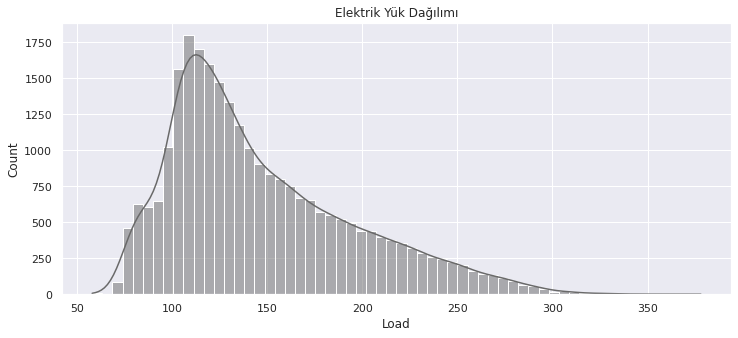

In [10]:
plt.figure(figsize=(12,5))
sns.set_theme(style="darkgrid")
sns.histplot(df["Load"] ,kde=True,bins=60,color='dimgray')
plt.xlabel("Load")
plt.title("Elektrik Yük Dağılımı")
plt.show()

### İstasyon Sıcaklıkları ile Elektrik Yükü arasındaki dağılımlar

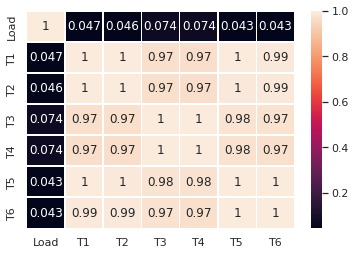

In [11]:
x = df[['Load','T1','T2','T3','T4','T5','T6']].corr()
sns.heatmap(x,linewidths=.5,annot=True);

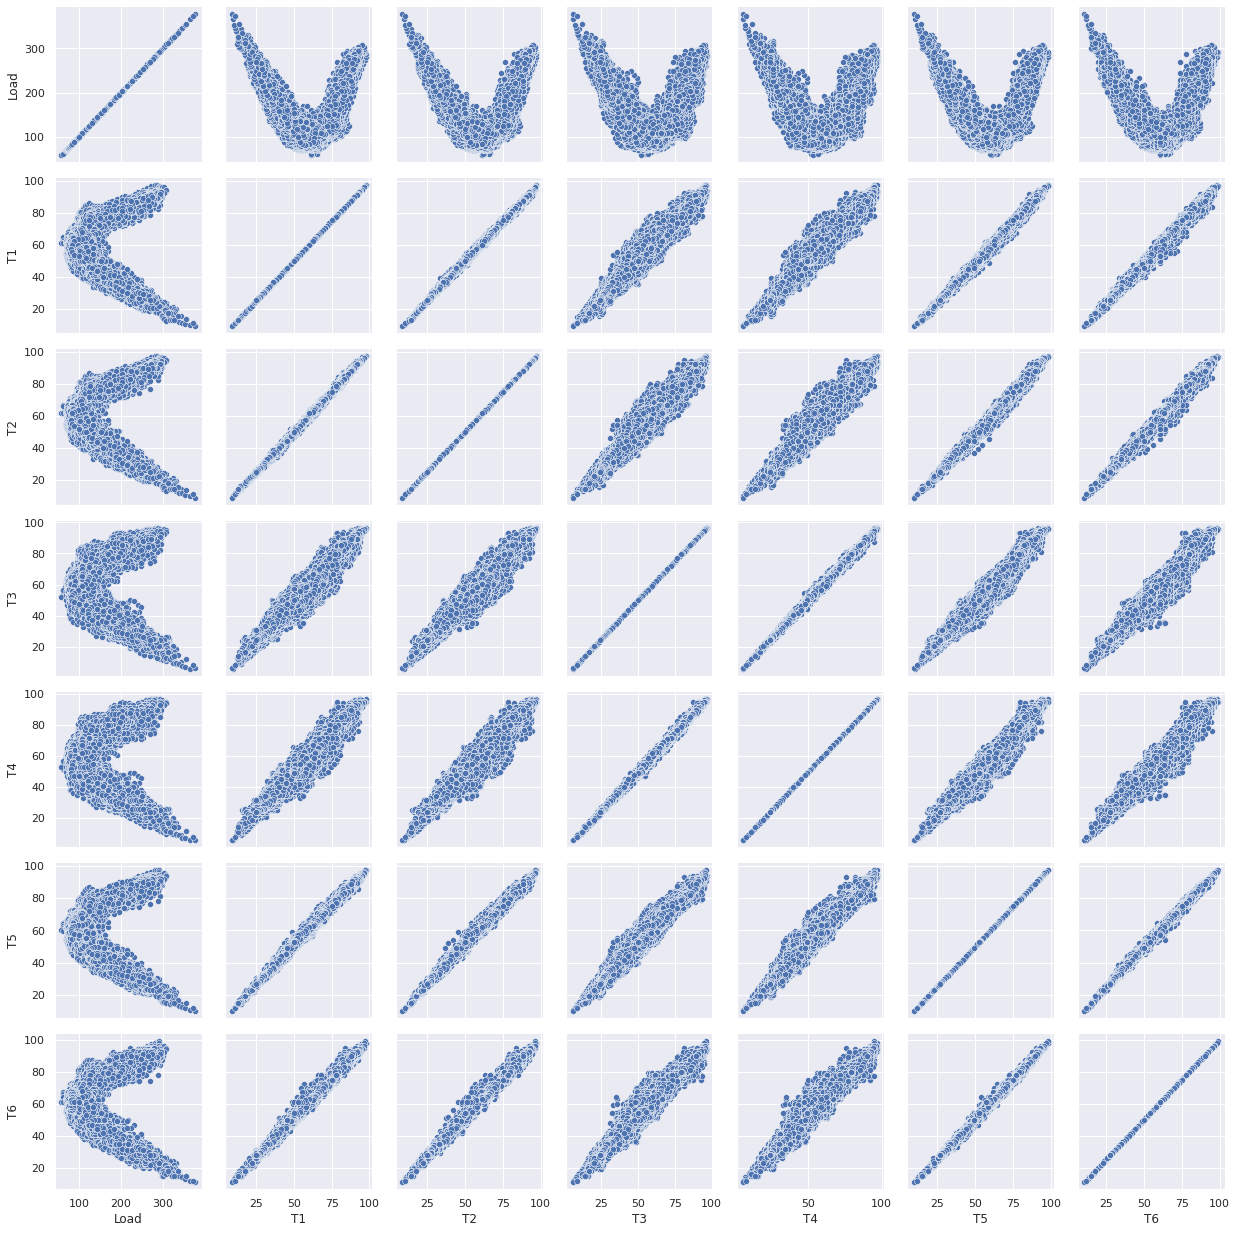

In [14]:
g = sns.PairGrid(df[['Load','T1','T2','T3','T4','T5','T6']])
g.map(sns.scatterplot);

In [ ]:
def pre_processing(df):
    X = df.drop(['Load'],axis=1)
    y = df['Load']

    X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
    
    return  X_train,X_test, y_train, y_test

In [ ]:
X_train,X_test, y_train, y_test = pre_processing(df)

In [ ]:
models = []

def regression_Models(X_train,X_test, y_train, y_test):

    models.append( ('DT',  DecisionTreeRegressor()) )
    models.append( ('KNN',KNeighborsRegressor()) )
    models.append( ('SVR', SVR()) )
    models.append( ('LR',  LinearRegression()) )
    models.append( ('RF',  RandomForestRegressor()) )
    models.append( ('MLP',  MLPRegressor()) )

    modeloutcomes = []
    modelnames = []

    for name,model in models:
        v_model = model.fit(X_train,y_train)
        v_pred  = v_model.predict(X_test)
        v_r2_score = r2_score(y_test,v_pred)

        print(name,v_r2_score)
        modeloutcomes.append(v_r2_score)
        modelnames.append(name)
        
    print(modeloutcomes)

regression_Models(X_train,X_test, y_train, y_test)

DT 0.8471430848205697
KNN 0.9170363032221498
SVR 0.8508592153148957
LR 0.11802542555762263
RF 0.9240474984717443
MLP 0.7971214192767057
[0.8471430848205697, 0.9170363032221498, 0.8508592153148957, 0.11802542555762263, 0.9240474984717443, 0.7971214192767057]


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


2018 Verisi ile Test etmek

In [ ]:
# Random Forest İçin 2018 Tahminleri

test_2018 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/case - electricity load forecast.xlsx",sheet_name=1)
test_2018 = test_2018.drop(columns='DATE')

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
rf = RandomForestRegressor().fit(X_train,y_train)
pred_rf = rf.predict(test_2018)

In [ ]:
pred_rf = pd.DataFrame (pred_rf, columns = ['Load_Predict_2018'])
pred_rf

,Load_Predict_2018
0,258.10415
1,261.07510
2,262.61038
3,261.98312
4,261.50953
...,...
1411,127.75562
1412,132.21687
1413,127.06491
1414,118.34566


In [ ]:
# KNN K en yakın komşu 2018 yılı tahminleri
knn = KNeighborsRegressor().fit(X_train,y_train)
knn_pred = knn.predict(test_2018)

knn_pred = pd.DataFrame (knn_pred, columns = ['Load_Predict_2018'])
knn_pred

,Load_Predict_2018
0,249.4026
1,253.8800
2,256.1488
3,253.9810
4,265.5194
...,...
1411,125.3026
1412,125.6572
1413,111.8190
1414,113.5028


In [ ]:
# Destek Vektör Makinesi 2018 yılı tahminleri
svr = SVR().fit(X_train,y_train)
svr_pred = svr.predict(test_2018)

svr_pred = pd.DataFrame (svr_pred, columns = ['Load_Predict_2018'])
svr_pred

,Load_Predict_2018
0,247.098966
1,251.103537
2,255.954644
3,258.857517
4,263.772950
...,...
1411,121.423399
1412,125.011670
1413,128.184720
1414,129.330299


In [ ]:
# Karar Ağaçları 2018 yılı tahminleri
decision_tree = DecisionTreeRegressor().fit(X_train,y_train)
decision_tree_pred = decision_tree.predict(test_2018)

decision_tree_pred = pd.DataFrame (decision_tree_pred, columns = ['Load_Predict_2018'])
decision_tree_pred

,Load_Predict_2018
0,257.630
1,260.852
2,260.664
3,262.842
4,259.132
...,...
1411,130.455
1412,125.220
1413,131.131
1414,124.052


In [ ]:
# Çok katmanlı perceptron 2018 yılı tahminleri
mlp = MLPRegressor().fit(X_train,y_train)
mlp_pred = mlp.predict(test_2018)

mlp_pred = pd.DataFrame (mlp_pred, columns = ['Load_Predict_2018'])
mlp_pred

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Load_Predict_2018
0,248.379279
1,257.025558
2,262.261115
3,265.353755
4,276.062176
...,...
1411,127.961844
1412,126.800236
1413,125.777284
1414,123.353816


# Tarih Sütunu Dahil Edildiğinde

In [ ]:
df2 = data.copy()
df2['DATE'] = df2['DATE'].values.astype("float64")

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    26304 non-null  float64
 1   Hour    26304 non-null  float64
 2   Load    26304 non-null  float64
 3   T1      26304 non-null  float64
 4   T2      26304 non-null  float64
 5   T3      26304 non-null  float64
 6   T4      26304 non-null  float64
 7   T5      26304 non-null  float64
 8   T6      26304 non-null  float64
dtypes: float64(9)
memory usage: 1.8 MB


In [ ]:
def pre_processing(df2):
    X = df2.drop(['Load'],axis=1)
    y = df2['Load']

    X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
    
    return  X_train,X_test, y_train, y_test

In [ ]:
X_train,X_test, y_train, y_test = pre_processing(df2)

In [ ]:
models = []

def regression_Models(X_train,X_test, y_train, y_test):

    models.append( ('DT',  DecisionTreeRegressor()) )
    models.append( ('KNN',KNeighborsRegressor()) )
    models.append( ('SVR', SVR()) )
    models.append( ('LR',  LinearRegression()) )
    models.append( ('RF',  RandomForestRegressor()) )
    models.append( ('MLP',  MLPRegressor()) )

    modeloutcomes = []
    modelnames = []

    for name,model in models:
        v_model = model.fit(X_train,y_train)
        v_pred  = v_model.predict(X_test)
        v_r2_score = r2_score(y_test,v_pred)

        print(name,v_r2_score)
        modeloutcomes.append(v_r2_score)
        modelnames.append(name)
        
    print(modeloutcomes)

regression_Models(X_train,X_test, y_train, y_test)

DT 0.8996108873328142
KNN 0.9282729098481927
SVR -0.07082458373698897
LR 0.10924540824459505
RF 0.952253810206935
MLP -87916529907.89618
[0.8996108873328142, 0.9282729098481927, -0.07082458373698897, 0.10924540824459505, 0.952253810206935, -87916529907.89618]


In [ ]:
# Random Forest İçin Tahminleme

test_2018 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/case - electricity load forecast.xlsx",sheet_name=1)
test_2018['DATE'] = test_2018['DATE'].values.astype("float64")


rf = RandomForestRegressor().fit(X_train,y_train)
rf_pred= rf.predict(test_2018)

rf_pred = pd.DataFrame (rf_pred, columns = ['Load_Predict_2018'])
rf_pred

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Load_Predict_2018
0,259.71399
1,263.32469
2,263.25436
3,264.72771
4,265.57213
...,...
1411,132.10706
1412,137.27553
1413,134.45813
1414,125.65946


In [ ]:
# KNN K en yakın komşu 2018 yılı tahminleri
knn = KNeighborsRegressor().fit(X_train,y_train)
knn_pred = knn.predict(test_2018)

knn_pred = pd.DataFrame (knn_pred, columns = ['Load_Predict_2018'])
knn_pred

,Load_Predict_2018
0,254.054
1,254.054
2,254.054
3,254.054
4,254.054
...,...
1411,254.054
1412,254.054
1413,254.054
1414,254.054


In [ ]:
dt = DecisionTreeRegressor().fit(X_train,y_train)
dt_pred = dt.predict(test_2018)

dt_pred = pd.DataFrame (dt_pred, columns = ['Load_Predict_2018'])
dt_pred

,Load_Predict_2018
0,260.192
1,260.852
2,260.664
3,262.842
4,279.527
...,...
1411,144.250
1412,143.160
1413,143.160
1414,135.715


### Tarihi Yıl-Ay-Gün olarak ayrı sütunlarda ayırma yöntemi

In [ ]:
import datetime as dt

df3 = data.copy()
df3['ConvertedDate'] = df3['DATE'].dt.strftime('%m/%d/%Y')
df3["day"] = ""
df3["month"] = ""
df3["year"] = ""

df3['ConvertedDate'] = df3['ConvertedDate'].str.replace("/","")
df3["year"] = df3["ConvertedDate"].str[4:8]
df3["month"] = df3["ConvertedDate"].str[0:2]
df3["day"] = df3["ConvertedDate"].str[2:4]

df3["year"] = df3["year"].astype(float)
df3["month"] = df3["month"].astype(float)
df3["day"] = df3["day"].astype(float)

df3 = df3.drop(['DATE','ConvertedDate'],axis=1) 

In [ ]:
df3

,Hour,Load,T1,T2,T3,T4,T5,T6,day,month,year
0,1.0,207.186,30.00,30.0,29.8,29.0,29.78,30.0,1.0,1.0,2015.0
1,2.0,205.035,29.75,30.0,29.0,29.0,29.56,30.0,1.0,1.0,2015.0
2,3.0,203.879,28.75,29.5,28.6,28.0,28.78,29.0,1.0,1.0,2015.0
3,4.0,201.576,29.25,29.0,26.8,27.0,28.56,29.0,1.0,1.0,2015.0
4,5.0,203.431,28.75,28.5,27.0,26.0,28.11,29.0,1.0,1.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...
26299,20.0,282.258,27.50,27.5,25.0,25.0,28.33,29.0,31.0,12.0,2017.0
26300,21.0,280.976,26.50,26.5,25.0,25.0,27.67,28.0,31.0,12.0,2017.0
26301,22.0,280.294,26.00,26.0,24.8,24.0,27.22,28.0,31.0,12.0,2017.0
26302,23.0,276.176,25.75,25.5,24.8,24.0,27.11,28.0,31.0,12.0,2017.0


In [ ]:
def pre_processing(df3):
    X = df3.drop(['Load'],axis=1)
    y = df3['Load']

    X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
    
    return  X_train,X_test, y_train, y_test

In [ ]:
X_train,X_test, y_train, y_test = pre_processing(df3)

In [ ]:
models = []

def regression_Models(X_train,X_test, y_train, y_test):

    models.append( ('DT',  DecisionTreeRegressor()) )
    models.append( ('KNN',KNeighborsRegressor()) )
    models.append( ('SVR', SVR()) )
    models.append( ('LR',  LinearRegression()) )
    models.append( ('RF',  RandomForestRegressor()) )
    models.append( ('MLP',  MLPRegressor()) )
    

    modeloutcomes = []
    modelnames = []

    for name,model in models:
        v_model = model.fit(X_train,y_train)
        v_pred  = v_model.predict(X_test)
        v_r2_score = r2_score(y_test,v_pred)

        print(name,v_r2_score)
        modeloutcomes.append(v_r2_score)
        modelnames.append(name)
        
    print(modeloutcomes)

regression_Models(X_train,X_test, y_train, y_test)

DT 0.921693819021844
KNN 0.9413665201370792
SVR -0.06904231716311493
LR 0.12370401919092922
RF 0.9614634546725639
MLP 0.8833093609949266
[0.921693819021844, 0.9413665201370792, -0.06904231716311493, 0.12370401919092922, 0.9614634546725639, 0.8833093609949266]


In [ ]:
# Random Forest İçin Tahminleme

test_2018 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/case - electricity load forecast.xlsx",sheet_name=1)

test_2018['ConvertedDate'] = test_2018['DATE'].dt.strftime('%m/%d/%Y')
test_2018["day"] = ""
test_2018["month"] = ""
test_2018["year"] = ""

test_2018['ConvertedDate'] = test_2018['ConvertedDate'].str.replace("/","")
test_2018["year"] = test_2018["ConvertedDate"].str[4:8]
test_2018["month"] = test_2018["ConvertedDate"].str[0:2]
test_2018["day"] = test_2018["ConvertedDate"].str[2:4]

test_2018["year"] = test_2018["year"].astype(float)
test_2018["month"] = test_2018["month"].astype(float)
test_2018["day"] = test_2018["day"].astype(float)

test_2018 = test_2018.drop(['DATE','ConvertedDate'],axis=1) 


rf = RandomForestRegressor().fit(X_train,y_train)
rf_pred = rf.predict(test_2018)

rf_pred = pd.DataFrame (rf_pred, columns = ['Load_Predict_2018'])
rf_pred

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Load_Predict_2018
0,255.74261
1,261.33860
2,263.40297
3,263.51110
4,265.44282
...,...
1411,120.56660
1412,119.70359
1413,124.34586
1414,109.43570


In [ ]:
dt = DecisionTreeRegressor().fit(X_train,y_train)
dt_pred = dt.predict(test_2018)

dt_pred = pd.DataFrame (dt_pred, columns = ['Load_Predict_2018'])
dt_pred

,Load_Predict_2018
0,261.924
1,279.527
2,279.527
3,279.527
4,279.527
...,...
1411,121.121
1412,121.106
1413,130.695
1414,99.210


In [ ]:
knn = KNeighborsRegressor().fit(X_train,y_train)
knn_pred = knn.predict(test_2018)

knn_pred = pd.DataFrame (knn_pred, columns = ['Load_Predict_2018'])
knn_pred

,Load_Predict_2018
0,235.4434
1,255.9376
2,264.2858
3,264.2858
4,274.5554
...,...
1411,111.0696
1412,126.8820
1413,114.5756
1414,114.2280


In [ ]:
# MLP 2018 yılı elektrik yükü tahminleri
mlp = MLPRegressor().fit(X_train,y_train)
mlp_pred = mlp.predict(test_2018)

mlp_pred = pd.DataFrame (mlp_pred, columns = ['Load_Predict_2018'])
mlp_pred

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Load_Predict_2018
0,243.787906
1,248.561008
2,254.380874
3,257.929695
4,264.501164
...,...
1411,122.507467
1412,124.576244
1413,127.193041
1414,128.565144


# LSTM MODELİ

In [ ]:
from numpy import concatenate
from pandas import read_excel,DataFrame,concat,to_datetime

from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score

from keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout

import matplotlib.pyplot as plt

In [ ]:
def series_to_supevised(dataset, n_in=1, n_out=1, dropnan=True):

  num_vars = 1 if type(dataset) is list else dataset.shape[1]
  dataframe = DataFrame(dataset)
  cols, names = list(), list()
    
    # input sequence (t-n, ....t-1)
  for i in range(n_in, 0, -1):
    cols.append(dataframe.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(num_vars)]
    # forecast sequence (t, t+1 .... t+n)
  for i in range(0, n_out):
    cols.append(dataframe.shift(-i))
    if i == 0:
      names += [('var%d(t)' % (j+1)) for j in range(num_vars)]
    else:
      names += [('var%d(t+%d)' % (j+1, i)) for j in range(num_vars)]
    
    # put it all together 
  agg = concat(cols, axis=1)
  agg.columns = names
    
    # drop rows with NaN values
  if dropnan:
    agg.dropna(inplace=True)
    return agg

In [ ]:
dataset = read_excel('/content/drive/MyDrive/Colab Notebooks/case - electricity load forecast.xlsx')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    26304 non-null  datetime64[ns]
 1   Hour    26304 non-null  float64       
 2   Load    26304 non-null  float64       
 3   T1      26304 non-null  float64       
 4   T2      26304 non-null  float64       
 5   T3      26304 non-null  float64       
 6   T4      26304 non-null  float64       
 7   T5      26304 non-null  float64       
 8   T6      26304 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 1.8 MB


In [ ]:
# x = giriş y= çıkış değerleri
values = dataset.values
X = values[:,[0,1,3,4,5,6,7,8]]
Y = values[:,2]

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3)

In [ ]:
X_Train = X_Train.reshape((X_Train.shape[0], 1, X_Train.shape[1]))
X_Test = X_Test.reshape((X_Test.shape[0], 1, X_Test.shape[1]))

In [ ]:
X_Train

array([[[Timestamp('2016-05-31 00:00:00'), 20.0, 75.5, ..., 82.0, 77.22,
         75.0]],

       [[Timestamp('2016-01-19 00:00:00'), 16.0, 31.5, ..., 32.0, 33.11,
         33.0]],

       [[Timestamp('2015-02-27 00:00:00'), 24.0, 32.25, ..., 32.0,
         33.78, 34.0]],

       ...,

       [[Timestamp('2016-10-18 00:00:00'), 21.0, 72.25, ..., 72.0,
         71.78, 73.0]],

       [[Timestamp('2017-01-06 00:00:00'), 23.0, 35.25, ..., 31.0,
         36.89, 37.0]],

       [[Timestamp('2017-11-16 00:00:00'), 14.0, 65.0, ..., 65.0, 65.0,
         65.0]]], dtype=object)

In [ ]:
model = Sequential()
model.add(LSTM(100,return_sequences=True, input_shape=(X_Train.shape[1], X_Train.shape[2])))
model.add(Dropout(0.5))
model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')

history = model.fit(X_Train, Y_Train, epochs=70, batch_size=10, validation_data=(X_Test, Y_Test), verbose=2, shuffle=False)

ValueError: ignored

In [ ]:
train_size = 23377
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Gün Sayıları (training set, test set): " + str((len(train), len(test))))

Gün Sayıları (training set, test set): (23377, 2927)


# GRU

In [ ]:
Enrol_window = 100

print ('enrol window set to',Enrol_window )

enrol window set to 100


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
def load_data(datasetname, column, seq_len, normalise_window):
    # A support function to help prepare datasets for an RNN/LSTM/GRU
    data = datasetname.loc[:,column]

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    if normalise_window:
        #result = sc.fit_transform(result)
        result = normalise_windows(result)

    result = np.array(result)

    #Last 10% is used for validation test, first 90% for training
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]


def normalise_windows(window_data):
    # A support function to normalize a dataset
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

def predict_sequence_full(model, data, window_size):
    #Shift the window by 1 new prediction each time, re-run predictions on new window
    curr_frame = data[0]
    predicted = []
    for i in range(len(data)):
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
    return predicted

def predict_sequences_multiple(model, data, window_size, prediction_len):
    #Predict sequence of <prediction_len> steps before shifting prediction run forward by <prediction_len> steps
    prediction_seqs = []
    for i in range(int(len(data)/prediction_len)):
        curr_frame = data[i*prediction_len]
        predicted = []
        for j in range(prediction_len):
            predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs

def plot_results(predicted_data, true_data): 
    fig = plt.figure(facecolor='white') 
    ax = fig.add_subplot(111) 
    ax.plot(true_data, label='True Data') 
    plt.plot(predicted_data, label='Prediction') 
    plt.legend() 
    plt.show() 


def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()

print ('Support functions defined')

Support functions defined


In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/case - electricity load forecast.xlsx', index_col='DATE', parse_dates=['DATE'])
dataset.head()

,Hour,Load,T1,T2,T3,T4,T5,T6
DATE,,,,,,,,
2015-01-01,1.0,207.186,30.00,30.0,29.8,29.0,29.78,30.0
2015-01-01,2.0,205.035,29.75,30.0,29.0,29.0,29.56,30.0
2015-01-01,3.0,203.879,28.75,29.5,28.6,28.0,28.78,29.0
2015-01-01,4.0,201.576,29.25,29.0,26.8,27.0,28.56,29.0
2015-01-01,5.0,203.431,28.75,28.5,27.0,26.0,28.11,29.0


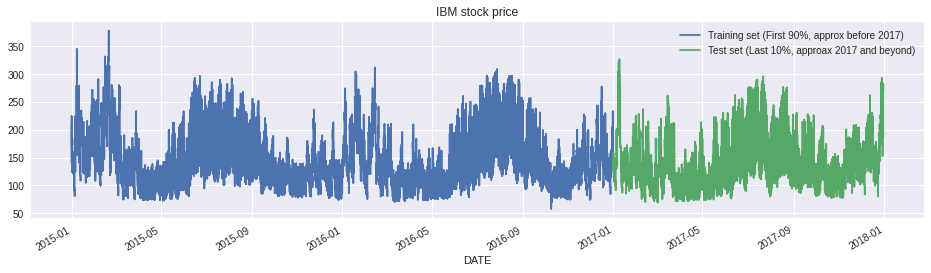

In [ ]:
feature_train, label_train, feature_test, label_test = load_data(dataset, 'Load', Enrol_window, True)

dataset["Load"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["Load"]['2017':].plot(figsize=(16,4),legend=True) # 10% is used for thraining data which is approx 2017 data
plt.legend(['Training set (First 90%, approx before 2017)','Test set (Last 10%, approax 2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [ ]:
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(feature_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mse', optimizer='adam')

print ('model compiled')

print (model.summary())

model compiled
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100, 50)           7950      
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 100)               45600     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 53,651
Trainable params: 53,651
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(feature_train, label_train, batch_size=30, epochs=50, validation_data = (feature_test, label_test))

Epoch 1/50
787/787 [==============================] - 17s 11ms/step - loss: 0.0063 - val_loss: 0.0017
Epoch 2/50
787/787 [==============================] - 8s 10ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 3/50
787/787 [==============================] - 10s 13ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 4/50
787/787 [==============================] - 8s 10ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 5/50
787/787 [==============================] - 8s 10ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 6/50
787/787 [==============================] - 8s 10ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 7/50
787/787 [==============================] - 8s 10ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 8/50
787/787 [==============================] - 8s 10ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 9/50
787/787 [==============================] - 9s 11ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 10/50
787/787 [==============================] - 8s 10ms/step - loss: 0.0019 - val_

82/82 [==============================] - 1s 5ms/step


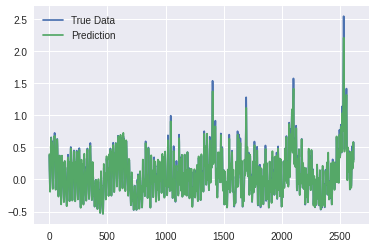

In [ ]:
predicted_stock_price = model.predict(feature_test)
plot_results(predicted_stock_price,label_test)

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.6 MB/s 
     |████████████████████████████████| 9.9 MB 54.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/case - electricity load forecast.xlsx")
df = data.copy()

df.head()

,DATE,Hour,Load,T1,T2,T3,T4,T5,T6
0,2015-01-01,1.0,207.186,30.00,30.0,29.8,29.0,29.78,30.0
1,2015-01-01,2.0,205.035,29.75,30.0,29.0,29.0,29.56,30.0
2,2015-01-01,3.0,203.879,28.75,29.5,28.6,28.0,28.78,29.0
3,2015-01-01,4.0,201.576,29.25,29.0,26.8,27.0,28.56,29.0
4,2015-01-01,5.0,203.431,28.75,28.5,27.0,26.0,28.11,29.0


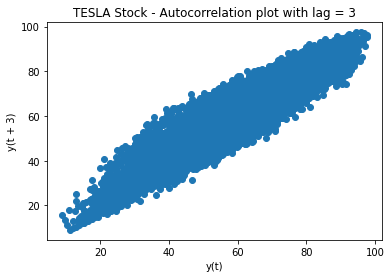

In [ ]:
plt.figure()
lag_plot(df['T1'], lag=3)
plt.title('TESLA Stock - Autocorrelation plot with lag = 3')
plt.show()

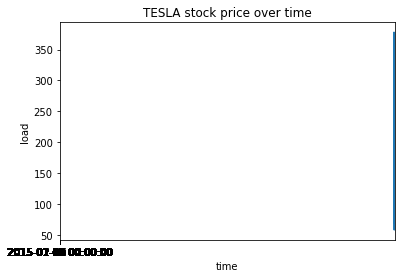

In [ ]:
plt.plot(df["DATE"], df["Load"])
plt.xticks(np.arange(0,1259), df['DATE'][0:1259])
plt.title("TESLA stock price over time")
plt.xlabel("time")
plt.ylabel("load")
plt.show()